In [5]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model

from keras.layers import Input, Lambda, Dense, Flatten, Activation, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import applications

In [3]:
incep_base = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
incep_base.trainable = False

inputs = Input(shape=(224, 224, 3))

x = incep_base(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(13, activation='softmax')(x)
incep_model = Model(inputs, outputs)


In [4]:
incep_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 13)                13325     
                                                             

In [7]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import netron
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.4,
    zoom_range=0.4,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

incep_base = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
incep_base.trainable = False

inputs = Input(shape=(224, 224, 3))

x = incep_base(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(13, activation='softmax')(x)
incep_model = Model(inputs, outputs)

incep_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.CategoricalAccuracy()]
)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2)

batch_size = 32
epochs = 25

train_generator = train_datagen.flow_from_directory(
    'E:/SBIR/Selected/train',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'E:/SBIR/Selected/train',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    'E:/SBIR/Selected/test',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

history = incep_model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    callbacks=[early_stopping, reduce_lr],
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size
)

test_loss, test_accuracy = incep_model.evaluate(test_generator)

print(f'Test Loss: {test_loss:.2f}, Test Accuracy: {test_accuracy:.2f}')


Found 624 images belonging to 13 classes.
Found 156 images belonging to 13 classes.
Found 260 images belonging to 13 classes.
Epoch 1/25


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x0000023E968F5820>
Traceback (most recent call last):
  File "e:\Ana\lib\weakref.py", line 371, in remove
    self = selfref()
KeyboardInterrupt: 
e:\Ana\lib\site-packages\keras\backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


19/19 [==============================] - 30s 1s/step - loss: 2.3769 - categorical_accuracy: 0.2314 - val_loss: 1.6178 - val_categorical_accuracy: 0.5625 - lr: 1.0000e-04
Epoch 2/25
 8/19 [===========>..................] - ETA: 10s - loss: 1.5923 - categorical_accuracy: 0.4531

KeyboardInterrupt: 

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
import netron




incep_base = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
incep_base.trainable = False

inputs = Input(shape=(224, 224, 3))

x = incep_base(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(13, activation='softmax')(x)
incep_model = Model(inputs, outputs)

incep_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.CategoricalAccuracy()]
)

incep_model.save('model1.h5')

netron.start('model1.h5')

In [4]:
import pickle
with open('model_incep.pkl', 'wb') as file:
      pickle.dump(incep_model, file)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dropout
......vars
...layers\functional
......vars
...layers\functional\layers\activation
......vars
...layers\functional\layers\activation_1
......vars
...layers\functional\layers\activation_10
......vars
...layers\functional\layers\activation_11
......vars
...layers\functional\layers\activation_12
......vars
...layers\functional\layers\activation_13
......vars
...layers\functional\layers\activation_14
......vars
...layers\functional\layers\activation_15
......vars
...layers\functional\layers\activation_16
......vars
...layers\functional\layers\activation_17
......vars
...layers\functional\layers\activation_18
......vars
...layers\functional\layers\activation_19
......vars
...layers\functional\layers\activation_2
......vars
...layers\functional\layers\activation_20
......vars
...layers\functional\layers\activati

In [7]:
# Renders the charts for training accuracy and loss.
import matplotlib.pyplot as plt
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['categorical_accuracy']
    val_accuracy = training_history.history['val_categorical_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()

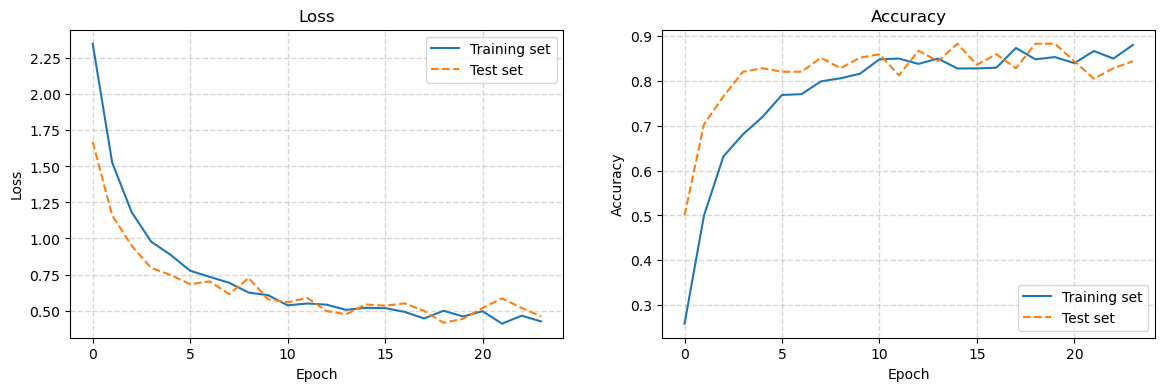

In [8]:
render_training_history(history)